<a href="https://colab.research.google.com/github/Naandes/BootcampAluraDados/blob/main/modulo_1/aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importação de bibliotecas**

Vamos importar agora todas as bibliotecas que serão usadas na aula 1 do módulo 1

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

## **Importação e limpeza do DataFrame**

Vamos agoras importar o nosso DataFrame e deixar o melhor possível para as análises posteriores

### **Importação do DataFrame**

O DataFrame que estamos pegando é do DATASUS, uma fonte de dados do governo sobre a saúde pública. Mais específico, ele é referente sobre o valor gasto com internações por estado de acordo que foi processado a internação, na faixa de tempo de Janeiro de 2008 até Março de 2021.

In [41]:
##Importando DataFrame
uri = "https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv"
df = pd.read_csv(uri, encoding='ISO-8859-1',skiprows = 3, sep = ';', skipfooter = 12, thousands='.', decimal=',')
df.head

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


<bound method NDFrame.head of       Unidade da Federação     2008/Jan  ...      2020/Ago         Total
0              11 Rondônia   1388528.39  ...   10285455.78  9.291297e+08
1                  12 Acre    902416.00  ...             -  4.206680e+08
2              13 Amazonas   4735529.42  ...   14726443.67  1.771655e+09
3               14 Roraima    657889.53  ...    2826486.18  3.050109e+08
4                  15 Pará  18864744.11  ...   39911193.02  4.437116e+09
5                 16 Amapá   1120973.34  ...    2942273.94  2.916380e+08
6             17 Tocantins   3441592.69  ...    8240261.38  9.999986e+08
7              21 Maranhão  10723506.39  ...   28587541.78  3.632861e+09
8                 22 Piauí   7985142.43  ...   23210624.20  2.130616e+09
9                 23 Ceará  15539821.90  ...   59808605.59  6.197357e+09
10  24 Rio Grande do Norte   5947814.08  ...   24929930.72  2.477372e+09
11              25 Paraíba  10723002.45  ...   22130016.81  2.470550e+09
12           26 Perna

### **Tratando o dataframe**

Vamos renomear as colunas dos estados do Brasil mais o distríto federal com suas abreviações.

#### **Renomeando alguns nomes**

In [42]:
df["Unidade da Federação"].unique() #Facilitar para copiar os nomes únicos da coluna

array(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco',
       '27 Alagoas', '28 Sergipe', '29 Bahia', '31 Minas Gerais',
       '32 Espírito Santo', '33 Rio de Janeiro', '35 São Paulo',
       '41 Paraná', '42 Santa Catarina', '43 Rio Grande do Sul',
       '50 Mato Grosso do Sul', '51 Mato Grosso', '52 Goiás',
       '53 Distrito Federal'], dtype=object)

In [43]:
maps = {'11 Rondônia' : 'RO' , 
        '12 Acre' : 'AC',
        '13 Amazonas' : 'AM',
        '14 Roraima' : 'RR',
        '15 Pará' : 'PA',
       '16 Amapá' : 'AP',
        '17 Tocantins' : 'TO',
        '21 Maranhão' : 'MA',
        '22 Piauí' : 'PI', 
        '23 Ceará' : 'CE',
       '24 Rio Grande do Norte' : 'RN',
        '25 Paraíba' : 'PB',
        '26 Pernambuco' :'PE',
       '27 Alagoas' : 'AL',
        '28 Sergipe' : 'SE', 
        '29 Bahia' : 'BA', 
        '31 Minas Gerais' : 'MG',
       '32 Espírito Santo' : 'ES', 
        '33 Rio de Janeiro' : 'RJ', 
        '35 São Paulo' : 'SP',
       '41 Paraná' : 'PR', 
        '42 Santa Catarina' : 'SC', 
        '43 Rio Grande do Sul' : 'RS',
       '50 Mato Grosso do Sul' : 'MS', 
        '51 Mato Grosso' : 'MT', 
        '52 Goiás' : 'GO',
       '53 Distrito Federal' : 'DF'}

In [44]:
df.rename(columns={'Unidade da Federação': 'UF'}, inplace=True) #Trocando nome de Unidade da Federação para UF
df['UF'] = df.replace({'UF': maps}) #Trocando os nomes dos estados pelas abreviações
df


,UF,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,RO,1388528.39,2.931283e+06,1.541683e+06,1.525315e+06,1.645954e+06,1.406151e+06,3.065279e+06,3.231495e+06,3.117179e+06,3.068430e+06,2.825839e+06,2.931174e+06,2.885269e+06,2.860104e+06,3.684945e+06,3.607290e+06,3.774357e+06,3.706712e+06,3.763188e+06,3.533626e+06,3605007.43,3.907033e+06,3.939821e+06,3.901084e+06,3.684407e+06,3.623016e+06,3.890462e+06,4.193534e+06,4.534401e+06,4.451208e+06,4.874593e+06,4.460802e+06,5.067886e+06,4.511093e+06,4.394680e+06,4.098742e+06,4.411499e+06,3.868618e+06,4.298703e+06,...,7.948292e+06,8.438077e+06,7.656645e+06,8.047743e+06,8.657206e+06,8.150894e+06,7.507845e+06,7.998346e+06,8.893684e+06,8.867793e+06,8.871408e+06,8.501602e+06,8.315108e+06,8.525500e+06,9.177611e+06,7.368996e+06,8.835095e+06,8.328187e+06,8.408513e+06,9.351706e+06,8.143008e+06,8.949742e+06,9.630553e+06,9.581970e+06,7.891114e+06,9.792371e+06,9.170788e+06,8.816847e+06,1.002455e+07,9.675424e+06,8.085026e+06,9.221412e+06,7.493311e+06,8.092260e+06,7.273844e+06,7.652120e+06,8.725531e+06,1.115211e+07,10285455.78,9.291297e+08
1,AC,902416.00,1.497206e+06,1.794028e+06,1.730469e+06,1.819444e+06,1.828496e+06,2.511755e+06,2.089107e+06,2.275709e+06,1.923887e+06,1.756987e+06,2.235640e+06,2.497116e+06,2.253558e+06,2.122674e+06,2.834318e+06,2.722066e+06,2.432832e+06,2.630191e+06,2.307579e+06,-,2.826477e+06,2.170791e+06,2.541526e+06,2.491042e+06,1.954474e+06,2.389996e+06,2.654879e+06,2.844085e+06,2.336207e+06,2.125143e+06,2.430294e+06,2.377738e+06,2.184747e+06,2.468453e+06,2.516285e+06,3.051370e+06,2.629104e+06,2.485452e+06,...,2.397513e+06,2.348760e+06,3.139155e+06,2.765063e+06,4.540085e+06,4.120229e+06,2.610455e+06,3.576595e+06,2.444567e+06,2.602434e+06,3.064163e+06,2.276237e+06,3.239474e+06,3.126430e+06,2.998866e+06,2.619710e+06,3.018049e+06,3.342614e+06,2.123426e+06,2.664655e+06,1.906430e+06,3.096440e+06,2.411628e+06,2.840631e+06,3.260154e+06,3.250723e+06,3.204999e+06,3.052746e+06,3.124802e+06,3.021522e+06,2.874871e+06,3.331804e+06,3.417691e+06,3.076003e+06,2.286643e+06,2.896340e+06,3.045246e+06,3.915193e+06,-,4.206680e+08
2,AM,4735529.42,7.118991e+06,8.196635e+06,8.259378e+06,7.831400e+06,8.477274e+06,9.368859e+06,9.352533e+06,9.363099e+06,8.618319e+06,6.555549e+06,7.777646e+06,7.403068e+06,6.683347e+06,9.927781e+06,8.844511e+06,9.079036e+06,8.832895e+06,9.373396e+06,9.578326e+06,9730634.16,9.179253e+06,8.314649e+06,9.050439e+06,9.419461e+06,8.680179e+06,9.168055e+06,9.897902e+06,9.651362e+06,1.085460e+07,1.041712e+07,8.718347e+06,8.221592e+06,9.613977e+06,9.927574e+06,9.470661e+06,9.736751e+06,8.745260e+06,9.380112e+06,...,1.278964e+07,1.437699e+07,1.424007e+07,1.359465e+07,1.458429e+07,1.315872e+07,1.316966e+07,1.357226e+07,1.308308e+07,1.432231e+07,1.464334e+07,1.463221e+07,1.450052e+07,1.484053e+07,1.442762e+07,1.581896e+07,1.635846e+07,1.539116e+07,1.415436e+07,1.679140e+07,1.436999e+07,1.633902e+07,1.562291e+07,1.648317e+07,1.542224e+07,1.596199e+07,1.578790e+07,1.651544e+07,1.573120e+07,1.574461e+07,1.434655e+07,1.601846e+07,1.491375e+07,1.506830e+07,1.350958e+07,1.965859e+07,2.089754e+07,1.934645e+07,14726443.67,1.771655e+09
3,RR,657889.53,7.779393e+05,7.186880e+05,8.399944e+05,8.623480e+05,8.324407e+05,9.966931e+05,8.942712e+05,9.104242e+05,1.191770e+06,1.056219e+06,1.244339e+06,1.085679e+06,9.695285e+05,1.393227e+06,1.273734e+06,1

Vamos analisar agora que tipo de dados o dataframe possui.[texto do link]

#### **Dados Faltantes**

In [45]:
df.isnull().sum().sort_values(ascending=False)[:10]

Total       0
2011/Dez    0
2012/Jul    0
2012/Jun    0
2012/Mai    0
2012/Abr    0
2012/Mar    0
2012/Fev    0
2012/Jan    0
2011/Nov    0
dtype: int64

`Peguei as 10 colunas que provavelmente teriam os maiores números de valores nulos e em nenhum possui dados nulos`

##**Gráficos**

Vamos criar um histograma com o total gasto por estados.

Text(0.5, 1.0, 'Valor por unidade da federação')

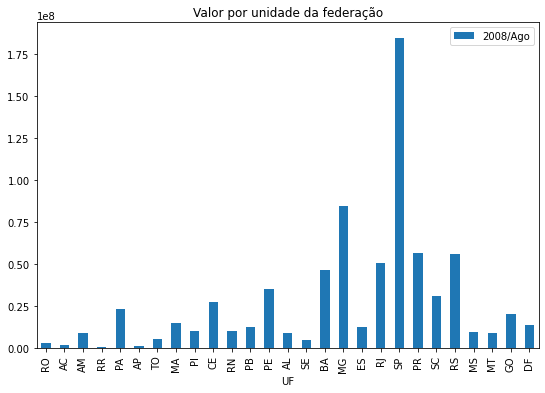

In [49]:
ax = df.plot(x='UF', y='2008/Ago', kind='bar', figsize=(9,6))
ax = 
plt.title('Valor por unidade da federação')